In [140]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Importando os dados

In [3]:
df = pd.read_csv('aluguel_residencial.csv', sep=';')

In [142]:
df

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Area,Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
21572,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,12.86,Apartamento
21573,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,29.63,Apartamento
21574,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,23.08,Apartamento
21575,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,29.17,Apartamento


### Transformando Variáveis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21577 entries, 0 to 21576
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Tipo        21577 non-null  category
 1   Bairro      21577 non-null  category
 2   Quartos     21577 non-null  int64   
 3   Vagas       21577 non-null  int64   
 4   Suites      21577 non-null  int64   
 5   Area        21577 non-null  int64   
 6   Valor       21577 non-null  float64 
 7   Condominio  21577 non-null  float64 
 8   IPTU        21577 non-null  float64 
 9   Valor Area  21577 non-null  float64 
 10  Agregado    21577 non-null  category
dtypes: category(3), float64(4), int64(4)
memory usage: 1.4 MB


In [6]:
df = df.astype({'Tipo': 'category', 'Bairro': 'category', 'Agregado': 'category'})

### Analisando Outliers

Como temos 4 tipos de imóveis, em que são esperados valores distintos, farei a analise por tipo

Começando pela variável de valor

In [8]:
df.groupby(by='Tipo').Valor.describe()

,count,mean,std,min,25%,50%,75%,max
Tipo,,,,,,,,
Apartamento,18780.0,4805.295740,34918.476901,100.0,1700.0,2800.0,5000.0,4500000.0
Casa,965.0,6793.454922,8955.421677,400.0,1100.0,2200.0,9800.0,60000.0
Casa de Condomínio,996.0,11952.061245,26691.731961,560.0,4000.0,8500.0,15250.0,800000.0
Quitinete,836.0,1246.840909,560.525959,100.0,900.0,1150.0,1500.0,6500.0


<AxesSubplot:xlabel='Valor'>

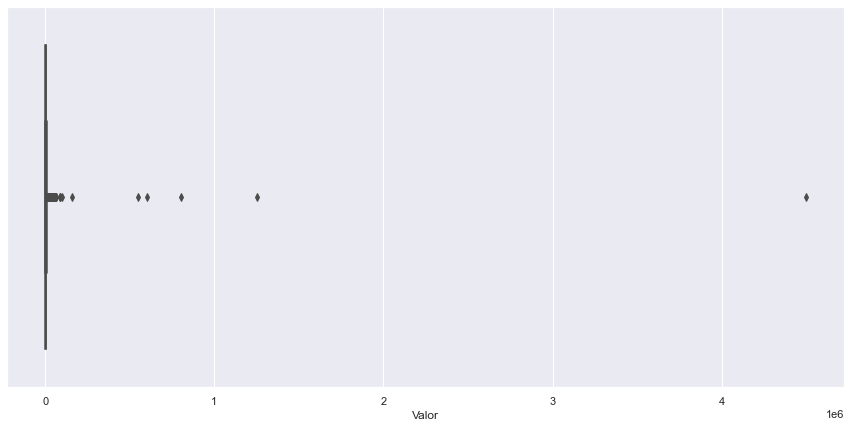

In [141]:
plt.subplots(figsize=(15, 7))

sns.boxplot(x='Valor', data=df)

Logo na tabela já é possível ver que um apartamento de aluguel por 4500000 é iniável

Criei um loop para construir um dataframe com todos os possíveis outliers

In [28]:
outliers_valor = pd.DataFrame()
for tipo in df.groupby(by='Tipo').groups.keys():
    q1_valor = df.groupby(by='Tipo').Valor.describe().loc[f'{tipo}', '25%']
    q3_valor = df.groupby(by='Tipo').Valor.describe().loc[f'{tipo}', '75%']
    iiq_valor = q3_valor - q1_valor
    li_valor = q1_valor - (1.5 * iiq_valor)
    ls_valor = q3_valor + (1.5 * iiq_valor)
    tipo_filter = df.query('Tipo == @tipo')
    outliers_valor = outliers_valor.append(tipo_filter.query('Valor >= @ls_valor or Valor <= @li_valor'))

In [27]:
outliers_valor

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Area,Agregado
11,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0,53.50,Apartamento
24,Apartamento,Copacabana,3,1,2,378,10000.0,2150.0,700.0,26.46,Apartamento
44,Apartamento,Península,4,3,4,267,18000.0,3100.0,400.0,67.42,Apartamento
60,Apartamento,Barra da Tijuca,4,4,4,240,12700.0,4400.0,1440.0,52.92,Apartamento
88,Apartamento,Lagoa,3,1,2,250,13900.0,2500.0,0.0,55.60,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
20020,Quitinete,Botafogo,1,1,0,64,4000.0,0.0,0.0,62.50,Apartamento
20305,Quitinete,Copacabana,1,0,0,30,2700.0,400.0,25.0,90.00,Apartamento
20544,Quitinete,Ipanema,1,0,1,30,6500.0,0.0,0.0,216.67,Apartamento
20613,Quitinete,Leblon,1,0,0,30,2800.0,715.0,0.0,93.33,Apartamento


O número de possíveis outliers obtido foi muito alto, por isso analisarei as variáveis de Valor Area e Bairro, dentro desse mesmo dataframe

Criei um dataframe com todos os bairros que aparecem no dataframe de outliers separados por tipo de imóvel

In [57]:
df_selecao_bairros = outliers_valor.groupby(by=['Tipo', 'Bairro'], as_index=False).groups.keys()

In [58]:
df_selecao_bairros = pd.DataFrame(index=df_selecao_bairros).reset_index()

In [59]:
df_selecao_bairros.rename({'level_0': 'Tipo', 'level_1': 'Bairro'}, axis='columns', inplace=True)

In [60]:
df_selecao_bairros

,Tipo,Bairro
0,Apartamento,Arpoador
1,Apartamento,Barra da Tijuca
2,Apartamento,Botafogo
3,Apartamento,Cidade Jardim
4,Apartamento,Copacabana
5,Apartamento,Flamengo
6,Apartamento,Freguesia (Jacarepaguá)
7,Apartamento,Gávea
8,Apartamento,Humaitá
9,Apartamento,Ipanema


Irei calcular se o imóvel é um outlier de acordo com o bairro e o tipo

In [61]:
outliers_bairro = pd.DataFrame()
for tipo in df.groupby(by='Tipo').groups.keys():
    bairros = df_selecao_bairros.query('Tipo == @tipo')['Bairro']
    for bairro in bairros:
        q1_valor = df.groupby(by=['Tipo', 'Bairro']).Valor.describe().loc[f'{tipo}', f'{bairro}']['25%']
        q3_valor = df.groupby(by=['Tipo', 'Bairro']).Valor.describe().loc[f'{tipo}', f'{bairro}']['75%']
        iiq_valor = q3_valor - q1_valor
        li_valor = q1_valor - (1.5 * iiq_valor)
        ls_valor = q3_valor + (1.5 * iiq_valor)
        bairro_filter = df.query('Tipo == @tipo and Bairro == @bairro')
        outliers_bairro = outliers_bairro.append(bairro_filter.query('Valor >= @ls_valor or Valor <= @li_valor'))

O dataframe outliers_bairro contém todos os imóveis que se distoam do Valor de seu tipo e bairro

Agora vou comparar os dois dataframes de outliers, para retirar do outliers_valor os imóveis que não são distoantes quando se olham os bairros

In [62]:
outliers_bairro_valor_rejeitados = outliers_valor.isin(outliers_bairro).query('Valor == False').index
len(outliers_bairro_valor_rejeitados)

1087

In [63]:
outliers = outliers_valor.drop(outliers_bairro_valor_rejeitados, axis='index')

In [64]:
outliers

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Area,Agregado
11,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0,53.50,Apartamento
24,Apartamento,Copacabana,3,1,2,378,10000.0,2150.0,700.0,26.46,Apartamento
44,Apartamento,Península,4,3,4,267,18000.0,3100.0,400.0,67.42,Apartamento
60,Apartamento,Barra da Tijuca,4,4,4,240,12700.0,4400.0,1440.0,52.92,Apartamento
91,Apartamento,Ipanema,3,1,1,150,25000.0,1616.0,4255.0,166.67,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
17442,Quitinete,Copacabana,1,0,0,30,2500.0,440.0,0.0,83.33,Apartamento
20020,Quitinete,Botafogo,1,1,0,64,4000.0,0.0,0.0,62.50,Apartamento
20305,Quitinete,Copacabana,1,0,0,30,2700.0,400.0,25.0,90.00,Apartamento
20544,Quitinete,Ipanema,1,0,1,30,6500.0,0.0,0.0,216.67,Apartamento


É importante também analisar os outliers da variável Valor Area, pois o area do imóvel pode justificar o alto preço

In [65]:
outliers_area = pd.DataFrame()
for tipo in df.groupby(by='Tipo').groups.keys():
    bairros = df_selecao_bairros.query('Tipo == @tipo')['Bairro']
    for bairro in bairros:
        q1_valor = df.groupby(by=['Tipo', 'Bairro'])['Valor Area'].describe().loc[f'{tipo}', f'{bairro}']['25%']
        q3_valor = df.groupby(by=['Tipo', 'Bairro'])['Valor Area'].describe().loc[f'{tipo}', f'{bairro}']['75%']
        iiq_valor = q3_valor - q1_valor
        li_valor = q1_valor - (1.5 * iiq_valor)
        ls_valor = q3_valor + (1.5 * iiq_valor)
        bairro_filter = df.query('Tipo == @tipo and Bairro == @bairro')
        outliers_area = outliers_area.append(bairro_filter.query('Valor >= @ls_valor or Valor <= @li_valor'))


In [66]:
outliers_area

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Area,Agregado
2747,Apartamento,Arpoador,2,4,2,190,8500.0,2600.0,611.0,44.74,Apartamento
2983,Apartamento,Arpoador,3,3,2,380,30000.0,9600.0,2000.0,78.95,Apartamento
3151,Apartamento,Arpoador,3,1,1,180,16887.0,2500.0,613.0,93.82,Apartamento
3315,Apartamento,Arpoador,3,3,2,370,30000.0,10000.0,0.0,81.08,Apartamento
4479,Apartamento,Arpoador,3,4,2,200,8000.0,2900.0,0.0,40.00,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
18855,Quitinete,Leblon,1,1,0,30,2350.0,560.0,620.0,78.33,Apartamento
19910,Quitinete,Leblon,1,0,0,22,1690.0,350.0,27.0,76.82,Apartamento
20613,Quitinete,Leblon,1,0,0,30,2800.0,715.0,0.0,93.33,Apartamento
20830,Quitinete,Leblon,1,0,0,21,1800.0,700.0,27.0,85.71,Apartamento


In [67]:
outliers_valor.isin(outliers_area).query('Valor == False')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Area,Agregado


Não há nenhum imóvel presente nos outliers já formados que o valor pode ser justificado pelo área

### Retirando os outliers do dataframe original

In [68]:
df_limpo = df.drop(outliers.index, axis='index')

### Visualização da Distribuição

Distribuição dos dados sem tratamento

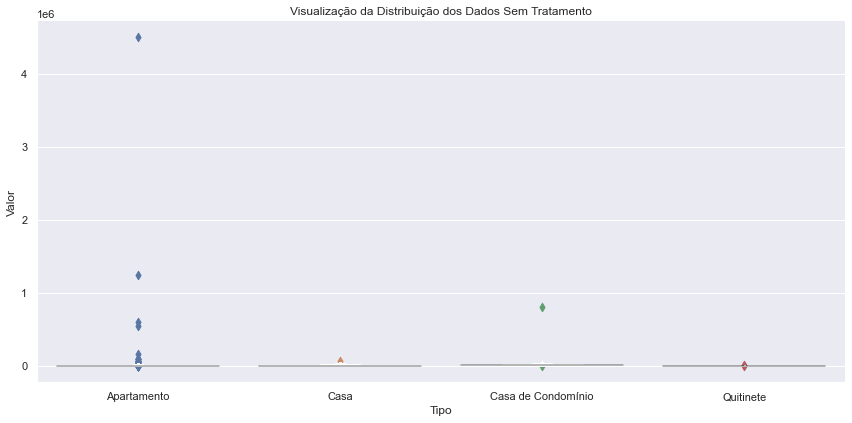

In [138]:
ax = sns.catplot(x='Tipo',  y='Valor',data=df,
     kind='boxen', height=6, aspect=2).set(title='Visualização da Distribuição dos Dados Sem Tratamento')

Distribuição dos dados limpos

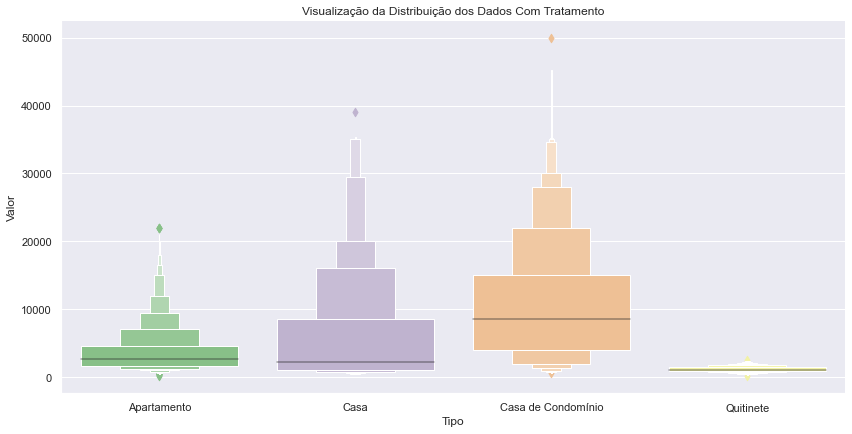

In [139]:
sns.catplot(y='Valor',  x='Tipo',data=df_limpo, kind='boxen',
    palette='Accent', height=6, aspect=2).set(title='Visualização da Distribuição dos Dados Com Tratamento')